## Final Project Submission

Please fill out:
* Student name: ISAAC MUNYAKA
* Student pace: PART TIME
* Scheduled project review date/time: 16/04/2023 / 0000HRS
* Instructor name: NOAH KANDIE
* Blog post URL:


# AN ANALYSIS TO INVESTIGATE THE KIND OF MOVIES THAT ARE PERFORMING WELL AT THE BOX OFFICE IN TERMS OF RATINGS, FOREIGN GROSS AND INSIGHTS.

### Business Understanding

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am therefore charged with exploring what types of films are currently doing the best at the box office and then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Problem Statement

Microsoft stakeholders and top management are finding it hard understanding the specific movies that are performing well in terms of ratings, foreign gross, insights such as number of votes and genres that performed well. Without understanding these metrics it will be hard for them to create original video content through their movie studio. They are not sure where to start in order to investigate these metrics.

### Project's goal

Therefore this project is focused on investigating the above metrics inorder to come up with a decisive action to enable the microsoft studio to create only movies that are going to perform well internationally and be a good investment plan. Only the kind of movies that attract great insights through high number of votes, high foreign gross and higher ratings will be prioritised in the production studio.


In [1]:
# importing the python libraries that I will use for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### Data Understanding

In this analysis I used three different datasets which are from Box office Mojo, IMDB SQLite Database and The movie Database.
The datasets will be cleaned before performing exploratory data analysis. The datasets were chosen since they have data on foreign gross, domestic gross, genres, insights through number of votes the movies attracted and the movie ratings.
This will present a clear picture of how different movies performed and thus lead to the stakeholders and top management at Microsoft making informed decisions before production at the new movie studio.

### 1. BOX OFFICE MOJO DATASET
I will first start by reading the dataset inorder to understand the data and the kind of measurements that I will use to determine the success of movies

In [2]:
bom_df=pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [3]:
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#### Size of the dataset

The above dataset has 3387 rows and 5 columns

In [4]:
bom_df.shape

(3387, 5)

### Checking for missing values

Missing values can occur for a variety of reasons, including measurement error, data entry errors and non-response.
The presence of missing data can cause biased estimates, inaccurate results, misleading visualisations as well as a loss of information.
By checking, identifying and addressing missing values before analysis, I will be able to increase the accuracy and reliability of my results

In [5]:
# getting the sum of all missing values in the dataframe
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
# From the dataframe studio column has five missing values, domestic_gross 28 missing values and 
# foreign_gross a total of 1350 missing values

In [7]:
# since studio column has no much significance in this analysis, I decided to drop it

In [8]:
bom_df.drop(columns=["studio"], inplace=True)

In [9]:
bom_df

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


### Filling missing values in domestic_gross with its mean

This column cannot be dropped as it is of great significance as a metric for movie perfomance in terms of gross revenue.
Therefore missing values will be filled with the mean of domestic_gross

In [10]:
bom_df["domestic_gross"].fillna(bom_df["domestic_gross"].mean(),inplace=True)

In [11]:
bom_df

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [12]:
bom_df.isna().sum()

title                0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [13]:
# domestic_gross has 0 missing values after filling with mean

### Addressing missing values in foreign_gross
For foreign gross I made an assumption that the missing values are as a result of the movies having 0 international sales
This might have been due to no international releases for those movies that have missing values
Therefore the best strategy was to fill with 0s since this column is vital in the analysis and cannot be dropped

In [14]:
bom_df["foreign_gross"].fillna(0, inplace=True)

In [15]:
bom_df

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,0,2018
3383,Edward II (2018 re-release),4800.0,0,2018
3384,El Pacto,2500.0,0,2018
3385,The Swan,2400.0,0,2018


In [16]:
bom_df.isna().sum()

title             0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [17]:
# There are no missing values in the dataframe now

### Checking for duplicates in the data

By identifying and removing duplicates, I want to ensure that each observation in the Box office Mojo dataset is represented only once.
This will help to ensure data accuracy, efficiency, and consistency, and thus help in obtaining reliable and meaningful insights from the data.

In [18]:
bom_df.duplicated().value_counts()

False    3387
dtype: int64

In [19]:
# False indicates that the data has no duplicates

### Identfying top 20 movies with high foreign gross

In [20]:
# Converting foreign gross to numeric type

bom_df["foreign_gross"] = pd.to_numeric(bom_df["foreign_gross"], errors="coerce")
# Sorting
top_20_df=bom_df.sort_values("foreign_gross", ascending=False).head(20)
top_20_df

,title,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,459000000.0,946400000.0,2015
727,Marvel's The Avengers,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,417700000.0,891800000.0,2018
1127,Frozen,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,245400000.0,858600000.0,2014
1876,Minions,336000000.0,823400000.0,2015
3083,Aquaman,335100000.0,812700000.0,2018
1128,Iron Man 3,409000000.0,805800000.0,2013


<function matplotlib.pyplot.show(close=None, block=None)>

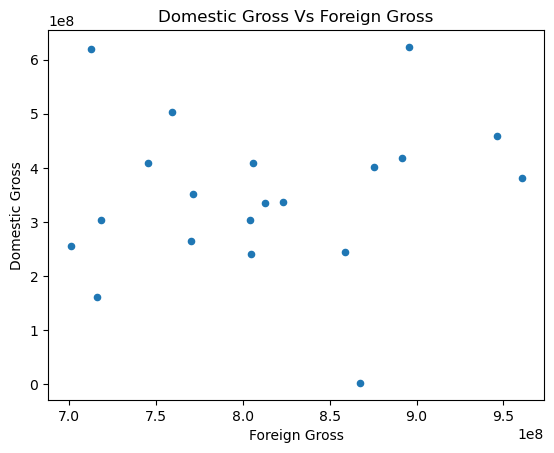

In [21]:
# Identifying the relationship between foreign gross and domestic gross
# Creating a scatter plot
top_20_df.plot.scatter("foreign_gross","domestic_gross")
plt.ylabel("Domestic Gross")
plt.xlabel("Foreign Gross")
plt.title("Domestic Gross Vs Foreign Gross")
plt.show

### 2. IMDB SQLITE DATABASE

In this Database with several tables, I picked only two tables; movie_ratings and movie_basics which contain valuable data such as average rating and number of votes which will be used as metrics of movie perfomance.

I will join the two tables into one using the key "movie_id" which uniquely identifies the movies.
Everything from the two tables will be selected and start filtering on irrelevant data and columns.

In [22]:
conn=sqlite3.connect("zippedData/im.db/im.db")
imdb_df=pd.read_sql("""
SELECT *
FROM movie_ratings
JOIN movie_basics 
 ON movie_ratings.movie_id= movie_basics.movie_id
""",conn)
imdb_df

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,tt9805820,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary


#### Size of the IMDB dataset

The dataframe has 73856 rows and 9 columns

### Dropping duplicating and irrelevant columns

In this dataframe that I have obtained from an SQLite database, movie_id columns appears twice and thus the need to drop one or even both since they are not that significant in my analysis.


In [23]:
#Dropping movie_id columns
imdb_df.drop(columns=["movie_id"],inplace=True)

In [24]:
imdb_df

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
73851,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


My columns of interest are the averagerating and numvotes which will be used as metrics for movie perfomance

### Checking for missing values

In [25]:
imdb_df.isna().sum()

averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

#### Decision made

Runtime_minutes has a total of 7620 missing values and genres 804 missing values. Runtime minutes will be dropped since there is no much use in this analysis and genres will be kept since it will enable me to understand the kind of movie genres that perfomed well.

In [26]:
imdb_df.drop(columns=["runtime_minutes"], inplace=True)

In [27]:
imdb_df

,averagerating,numvotes,primary_title,original_title,start_year,genres
0,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,Romance
1,8.9,559,Borderless,Borderless,2019,Documentary
2,6.4,20,Just Inès,Just Inès,2010,Drama
3,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,"Action,Adventure,Fantasy"
4,6.5,21,Até Onde?,Até Onde?,2011,"Mystery,Thriller"
...,...,...,...,...,...,...
73851,8.1,25,Caisa,Caisa,2018,Documentary
73852,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,"Action,Animation,Sci-Fi"
73853,4.7,14,Sisters,Sisters,2019,"Action,Drama"
73854,7.0,5,The Projectionist,The Projectionist,2019,Documentary


### Checking for duplicates in the data

In [28]:
imdb_df.duplicated().value_counts()

False    73856
dtype: int64

In [29]:
# This indicates that there are no duplicates in the data

### Plotting Top 15 movie genres with many votes 

In [30]:
#Sorting top 15 movies with high number of votes in descending order

top_15_df=imdb_df.sort_values("numvotes", ascending=False).head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

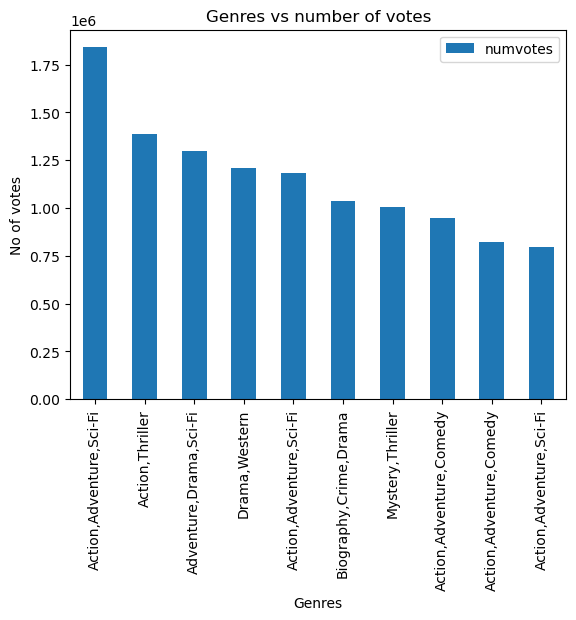

In [31]:
# Creating a bar chart
top_15_df.plot.bar("genres","numvotes")
plt.xlabel("Genres")
plt.ylabel("No of votes")
plt.title("Genres vs number of votes")
plt.show

### 3. THE MOVIE DATABASE

This dataset will be important in obtaining data for movie popularity, vote average and the vote count of different movies which will be vital in the analysis

In [32]:
tmdb_df=pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)
#index_col=0 was used to avoid having two index columns

In [33]:
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### Size of the the movie database

The dataframe has 26517 rows and 9 columns

In [34]:
#The next step will be dropping unnecessary columns by creating a list of unnecessary columns
unnecessary_cols=["genre_ids","id","original_language","original_title","release_date"]
#Dropping the columns
tmdb_df.drop(columns=unnecessary_cols,inplace=True)


In [35]:
tmdb_df

,popularity,title,vote_average,vote_count
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,How to Train Your Dragon,7.7,7610
2,28.515,Iron Man 2,6.8,12368
3,28.005,Toy Story,7.9,10174
4,27.920,Inception,8.3,22186
...,...,...,...,...
26512,0.600,Laboratory Conditions,0.0,1
26513,0.600,_EXHIBIT_84xxx_,0.0,1
26514,0.600,The Last One,0.0,1
26515,0.600,Trailer Made,0.0,1


#### Checking for missing values

In [36]:
tmdb_df.isna().sum()

popularity      0
title           0
vote_average    0
vote_count      0
dtype: int64

In [37]:
### There are no missing values in the movie database

#### Checking for duplicates


In [38]:
tmdb_df.duplicated().value_counts()

False    25493
True      1024
dtype: int64

In [39]:
# There are 9428 duplicated values in the dataframe

In [40]:
#Dropping the duplicates

tmdb_df=tmdb_df.drop_duplicates()

In [41]:
#confirming that the duplicates were dropped
tmdb_df.duplicated().value_counts()

False    25493
dtype: int64

In [42]:
# The duplicates have been gotten rid of

### Top 10 popular movies

In [43]:
#sorting top 10

top_10=tmdb_df.sort_values("popularity", ascending=False).head(10)
top_10

,popularity,title,vote_average,vote_count
23811,80.773,Avengers: Infinity War,8.3,13948
11019,78.123,John Wick,7.2,10081
23812,60.534,Spider-Man: Into the Spider-Verse,8.4,4048
11020,53.783,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,50.289,The Avengers,7.6,19673
11021,49.606,Guardians of the Galaxy,7.9,17958
20617,48.571,Blade Runner 2049,7.4,6679
23814,48.508,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,48.057,Ralph Breaks the Internet,7.2,2626
20618,46.775,Spider-Man: Homecoming,7.4,11585


Text(0.5, 1.0, 'Top 10 popular movies')

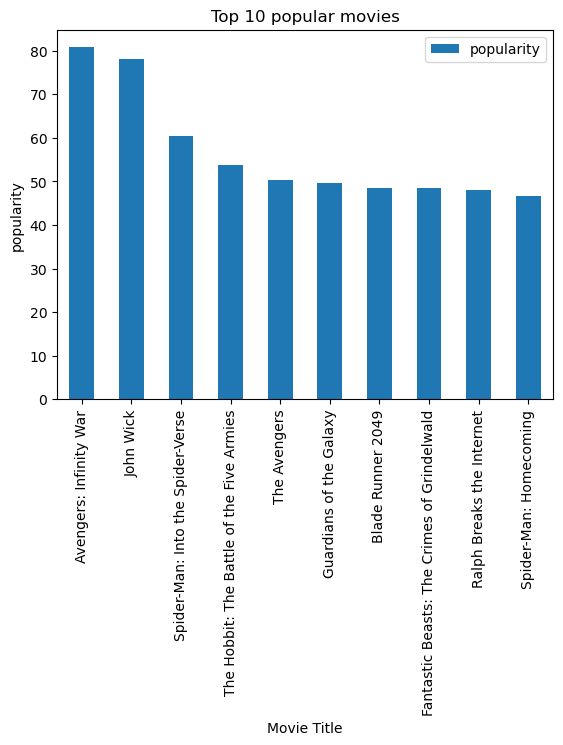

In [44]:
top_10.plot.bar("title", "popularity")
plt.xlabel("Movie Title")
plt.ylabel("popularity")
plt.title("Top 10 popular movies")

### Correlation between Vote count and Movie popularity

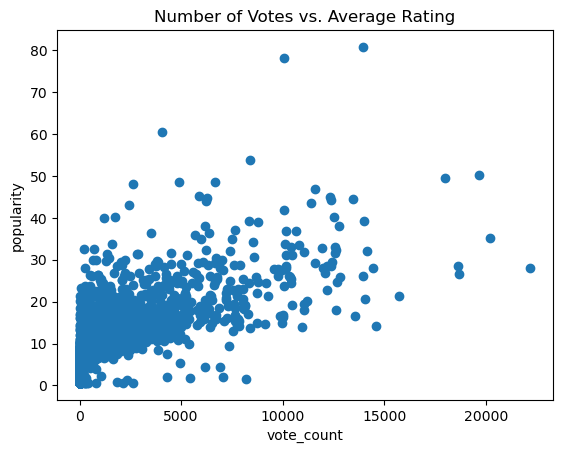

In [45]:
# plotting a scatter plot
plt.scatter(tmdb_df["vote_count"], tmdb_df["popularity"])

# Add axis labels and a title to the plot
plt.ylabel("popularity")
plt.xlabel("vote_count")
plt.title("Number of Votes vs. Average Rating")

# Show the plot
plt.show()

##### DISCUSSION

There is a low positive correlation between popularity and vote count of movies

### MERGING THE DATASETS

The three datasets will then be merged for Exploratory Data Analysis to take place.
Merging the datasets is vital since data will be combined from different sources to gain a more concise and complete information.
It will also increase the sample size thus improving the accuracy and reliability of my analysis.

In [46]:
to_merge=[bom_df, imdb_df, tmdb_df]

merged_df=pd.concat(to_merge)

In [47]:
irrelevant_columns=["year","primary_title","original_title","start_year"]
merged_df.drop(columns=irrelevant_columns, inplace=True)
merged_df

,title,domestic_gross,foreign_gross,averagerating,numvotes,genres,popularity,vote_average,vote_count
0,Toy Story 3,415000000.0,652000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),334200000.0,691300000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,292600000.0,535700000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,238700000.0,513900000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
26512,Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,0.6,0.0,1.0
26513,_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,0.6,0.0,1.0
26514,The Last One,NaN,NaN,NaN,NaN,NaN,0.6,0.0,1.0
26515,Trailer Made,NaN,NaN,NaN,NaN,NaN,0.6,0.0,1.0


### FINDINGS AND CONCLUSIONS

Different observations were noted when perfoming exploratory data analysis. These findings are explained below;

1. It was observed there was low positive correlation between domestic gross and foreign gross, which meant there little relationship between the two. 
Movies released between 2011 to 2018 earned the highest foreign gross. 


2. While analysing the top 15 genres with top number of votes received, it was observed that Action, Adventure, Sci-fi, Thriller, Drama, Comedy and Crime attracted a lot of insights from different people who voted.


3. While analysis top 10 popular movies, it was observed that sci-fi and action movies were the most popular, with Avengers: Infinity war topping with 80.773% popularity followed closely by John Wick with 78.123% and Spider Man: Into the spider verse with 60.534% popularity.


4. The final observation was that there was low positive correlation between number of votes and average rating of movies.

### RECOMMENDATIONS

Different recommendations were derived from the findings;

1.) It would be imperative for the stakeholders and top management at Microsoft to prioritise production of movies similar to those released between the year 2011 and 2018 since they earned the highest foreign gross. The top four earners included;
 a) Harry potter and the deathly hallows part 2 (2011)

 b) Avengers: Age of Ultron (2015)

 c) Marvel's The Avengers (2012)

 d) Jurrasic World: Fallen Kingdom (2018)

Since the top four earners were all Sci-fi movies, then Microsoft would have a great return on investment by creating Sci-Fi movies.

Foreign gross would lead to higher international sales. Higher foreign gross means there is also higher domestic sales, but higher domestic gross does not equate to higher foreign gross since from the scatter plot there is low positive relationship between the two variables.



2.) For Microsoft studio to create awareness of their existence and new products, it is recommended they focus more on Sci-Fi, Action, Adventure, Thriller, Drama, Crime and Comedy since they attracted the most votes from movie fans leading to high insights.



3.) For Microsoft to gain popularity and return on investments they should prioritise Sci-fi and Action movies such as Avengers: Infinity war topping with 80.773% popularity, John Wick with 78.123% and Spider Man: Into the spider verse with 60.534% popularity. 
This would ensure that the created movies at Microsoft studio attract great popularity leading to high international sales.

